In [23]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/jp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jp/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
df = pd.read_csv('Reviews.csv')
train_set = df.loc[(df['Score'] > 2) & (df['Id'] < 15000)]

In [27]:
# extract only nouns from text
def nouns(text):
    is_noun = lambda pos: pos[:2] == 'NN'
    tokens = word_tokenize(text)
    nouns_only = [word for word, pos in pos_tag(tokens) if is_noun(pos)]
    return ' '.join(nouns_only)

data_nouns = train_set['Text'].apply(nouns)

In [33]:
# custom stop words
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','br']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Create document-term matrix
vectorizer = CountVectorizer(stop_words=stop_words)
data_dtm = vectorizer.fit_transform(data_nouns)

In [35]:
# Fit LDA model using scikit-learn
lda_model = LDA(n_components=2, random_state=42)
lda_model.fit(data_dtm)

# Display the top words per topic
def display_topics(model, feature_names, no_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)

Topic 1:
coffee | product | cup | dog | amazon | treats | flavor | price | cups | dogs

Topic 2:
tea | flavor | taste | product | food | chips | sugar | chocolate | water | price



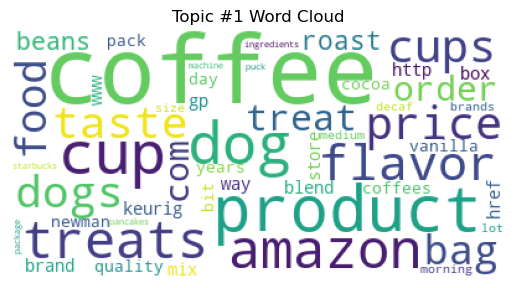

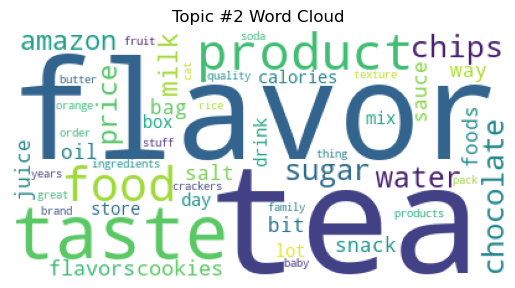

In [45]:
from wordcloud import WordCloud

# Visualize top words in each topic
for idx, topic in enumerate(lda_model.components_):
    plt.figure()
    plt.imshow(WordCloud(background_color='white')
               .fit_words({vectorizer.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[:-50 - 1:-1]}))
    plt.axis("off")
    plt.title(f"Topic #{idx + 1} Word Cloud")
    plt.show()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/jp/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/jp/nltk_data...
[nltk_data]   Package words is already up-to-date!


0     [(Vitality, ORGANIZATION), (Labrador, ORGANIZA...
2     [(Lewis, PERSON), (Lion, ORGANIZATION), (Witch...
4                    [(Great, GPE), (Delivery, PERSON)]
5                                                    []
6                                 [(Fralinger, PERSON)]
7                                                    []
8           [(Wheatgrass, ORGANIZATION), (Rye, PERSON)]
9                                      [(Good, PERSON)]
10    [(Tequila Picante Gourmet, PERSON), (Inclan, P...
11                                                   []
Name: Entities, dtype: object
Top 10 Entities:  [('McCann', 17), ('Amazon', 9), ('Apples', 6), ('Cinnamon', 6), ('Natural Balance', 6), ('Great', 5), ('Pack', 5), ('Brown Sugar', 5), ('Strawberry', 4), ('Maple', 4)]


/var/folders/ks/c91mfvj90z74bmm_n67dr46m0000gn/T/ipykernel_43780/3806696033.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Entities'] = train_set['Text'].head(100).apply(extract_named_entities)


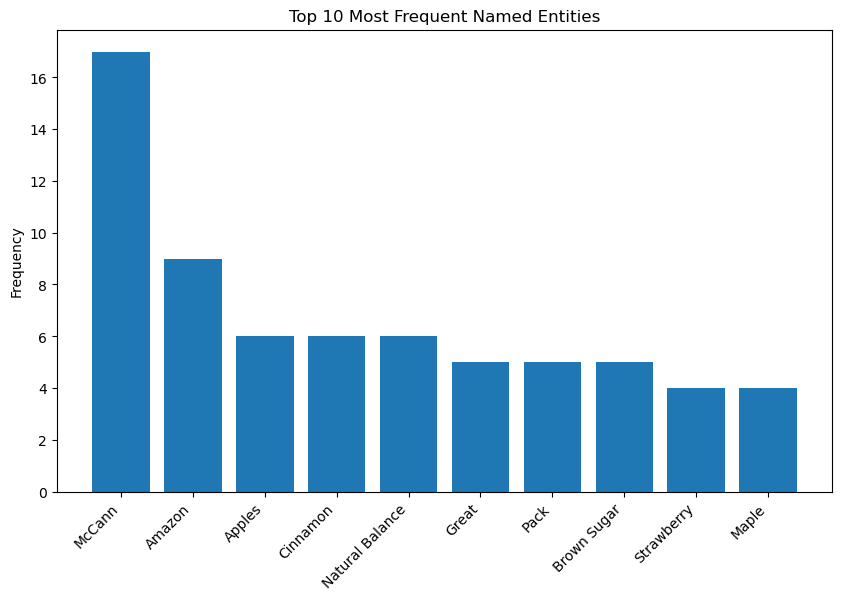

In [67]:
import nltk

# necessary NLTK resources
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree

def extract_named_entities(text):
    chunks = ne_chunk(pos_tag(word_tokenize(text)))
    entities = []
    for chunk in chunks:
        if isinstance(chunk, Tree):
            entity = " ".join(c[0] for c in chunk)
            entities.append((entity, chunk.label()))
    return entities

train_set['Entities'] = train_set['Text'].head(100).apply(extract_named_entities)
print(train_set['Entities'].head(10))

from collections import Counter
import matplotlib.pyplot as plt

# list of entities and count their occurrences (ignoring NaN and empty lists)
all_entities = [entity[0] for entities_list in train_set['Entities'] if isinstance(entities_list, list) for entity in entities_list if entity]

# frequency of each entity
entity_counts = Counter(all_entities)

# top 10 most common entities
top_entities = entity_counts.most_common(10)
print("Top 10 Entities: ", top_entities)

labels, values = zip(*top_entities)
plt.figure(figsize=(10, 6))
plt.bar(labels, values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Frequent Named Entities')
plt.ylabel('Frequency')
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jp/nltk_data...
/var/folders/ks/c91mfvj90z74bmm_n67dr46m0000gn/T/ipykernel_43780/4126467121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['sentiment'] = train_set['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
/var/folders/ks/c91mfvj90z74bmm_n67dr46m0000gn/T/ipykernel_43780/4126467121.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['sentiment_label'] = train_set['sentiment'].apply(classify_sen

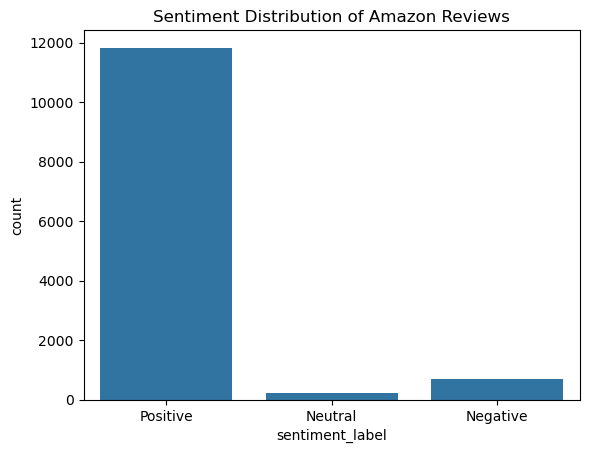

In [53]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
train_set['sentiment'] = train_set['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

train_set['sentiment_label'] = train_set['sentiment'].apply(classify_sentiment)

# Visualize sentiment distribution
sns.countplot(data=train_set, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'])
plt.title("Sentiment Distribution of Amazon Reviews")
plt.show()